In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualisation
import matplotlib.pyplot as plt #data visualisation


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [7]:
train_data =pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

In [44]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Analysis using train data

In [11]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
train_data.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [22]:
train_data.groupby(['Survived' , 'Sex']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Sex                                                                  
0        female           81      81    81   64     81     81      81    81   
         male            468     468   468  360    468    468     468   468   
1        female          233     233   233  197    233    233     233   233   
         male            109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Survived Sex                      
0        female      6        81  
         male       62       468  
1        female     91       231  
         male       45       109

In [23]:
train_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Check for Missing data

In [25]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
train_data.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [28]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
            return 29
        else:
            return 25
    else:
        return Age

In [29]:
train_data['Age'] = train_data[['Age','Pclass']].apply(age_approx, axis=1)


In [30]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
train_data['Embarked'] = train_data['Embarked'].fillna(value='S')

In [32]:
train_data=train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)


In [33]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Exploratory Data Analysis:

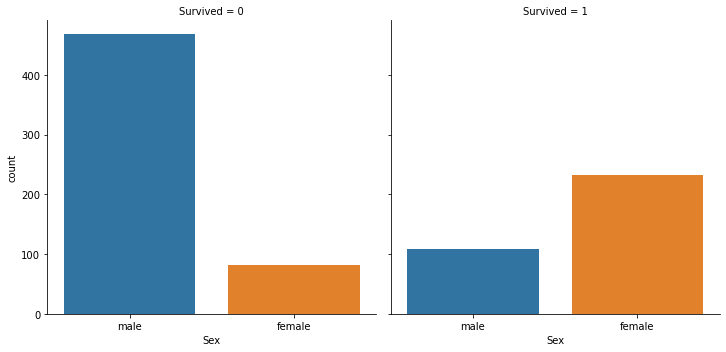

In [36]:
sns.catplot(x='Sex' , col= 'Survived' , kind= 'count' , data = train_data)

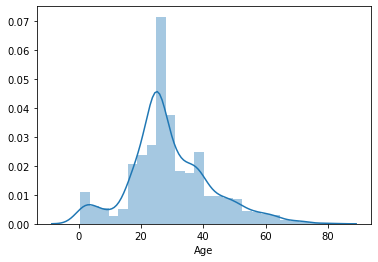

In [38]:
sns.distplot(train_data['Age'])

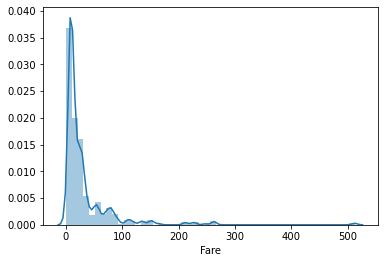

In [39]:
sns.distplot(train_data['Fare'])

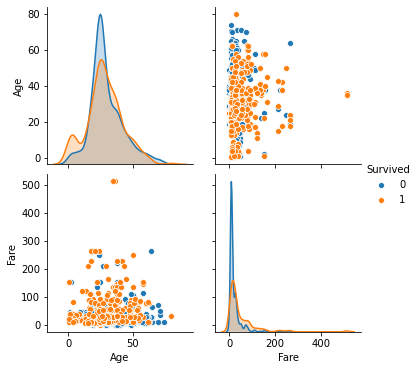

In [45]:
sns.pairplot(train_data , hue = 'Survived' , vars = ['Age' , 'Fare'])

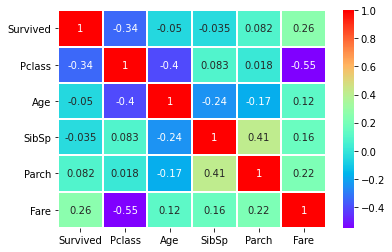

In [46]:
sns.heatmap(train_data.corr(), annot = True , cmap = 'rainbow',linecolor='white',linewidths=1)

## variables are not highly correlated in this case

## Feature Engineering

# One Hot Encoding

In [47]:
train_data = pd.get_dummies(train_data,columns=['Sex'] )

In [48]:
test_data = pd.get_dummies(test_data,columns=['Sex'] )

In [49]:
test_data = pd.get_dummies(test_data,columns=['Embarked'])

In [50]:
train_data = pd.get_dummies(train_data,columns=['Embarked'])

In [51]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [70]:
features = ["Pclass","Age","SibSp","Parch","Sex_male","Embarked_Q", "Embarked_S"]

In [71]:
x = train_data[features]

In [72]:
testdata = test_data[features]

In [57]:
testdata.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,1,1,0
1,3,47.0,1,0,0,0,1
2,2,62.0,0,0,1,1,0
3,3,27.0,0,0,1,0,1
4,3,22.0,1,1,0,0,1


In [58]:
y = train_data['Survived']

# Splitting the dataset into train and test

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [75]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(623, 7)
(623,)
(268, 7)
(268,)


# Classification models used:
     
     1) Logistic Regression
     2) Random Forest
     3) XgBoost
     4) support vector classifier

In [84]:
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid = {"C":np.logspace(-3,3,7), "penalty":["l2"]}

In [85]:
logreg     = LogisticRegression()
logreg_cv  = GridSearchCV(logreg,grid,cv=10)

logreg_cv.fit(x_train,y_train)
print("\ntuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("\naccuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}

accuracy : 0.8058371735791091


## cross validation

In [87]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

In [88]:
log_reg = cross_val_score(estimator = logreg_cv , X = x_test ,y = y_test , cv = 5 , scoring ='accuracy')
print(log_reg.mean())

0.7986722571628232


# Random Forest

## Hyper parameter tuning

In [89]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [94]:
best_parm = rf_randomcv.best_estimator_
y_pred    = best_parm.predict(x_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Accuracy Score 0.8097014925373134
Classification report:               precision    recall  f1-score   support

           0       0.80      0.91      0.85       159
           1       0.84      0.66      0.74       109

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



Text(0.5, 15.0, 'predicted label')

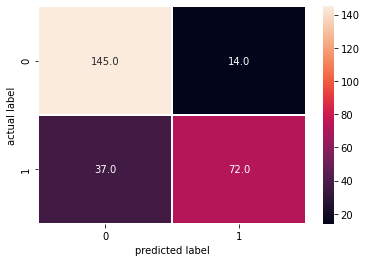

In [95]:
sns.heatmap(confusion_matrix(y_test , y_pred ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

# XGBoost

In [96]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [98]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [99]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [101]:
random_search.fit(x_train , y_train)
best_parm1 = random_search.best_estimator_
y_pred1   = best_parm1.predict(x_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred1)))
print("Classification report: {}".format(classification_report(y_test,y_pred1)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Accuracy Score 0.8059701492537313
Classification report:               precision    recall  f1-score   support

           0       0.80      0.90      0.85       159
           1       0.82      0.67      0.74       109

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.3s finished


Text(0.5, 15.0, 'predicted label')

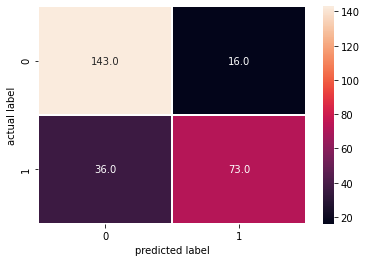

In [102]:
sns.heatmap(confusion_matrix(y_test , y_pred1 ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

## Support Vector Classifier

In [103]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],
                     'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

In [105]:
from sklearn.svm import SVC
rs = RandomizedSearchCV(SVC(), tuned_parameters, cv=5)
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions=[{'C': [1], 'gamma': [0.1],
                                         'kernel': ['rbf']},
                                        {'C': [1], 'kernel': ['linear']}])

In [106]:
b_parm = rs.best_estimator_
y_pred2   = b_parm.predict(x_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred2)))
print("Classification report: {}".format(classification_report(y_test,y_pred2)))

Accuracy Score 0.8171641791044776
Classification report:               precision    recall  f1-score   support

           0       0.81      0.90      0.85       159
           1       0.83      0.70      0.76       109

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.81       268



Text(0.5, 15.0, 'predicted label')

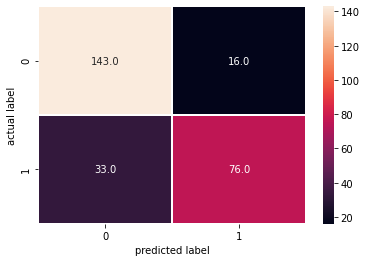

In [107]:
sns.heatmap(confusion_matrix(y_test , y_pred2 ) , annot = True,fmt=".1f",linecolor='white',linewidths=1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

 # Final Prediction using svc

In [115]:
predicted_result = pd.Series(b_parm.predict(testdata.dropna()), name = "Survived").astype(int)
result = pd.concat([test_data['PassengerId'],predicted_result],axis=1)
result.to_csv('titanic_prediction_new.csv',index=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
result.head()